<a href="https://colab.research.google.com/github/vRodrigues22/Atividade2_ICeCD/blob/main/Atividade2_Z_score_e_Distribuicao_Binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 2: Z-score e Distribuição Binomial

**Nome:** Valéria Oliveira Rodrigues

**Instituição:** Universidade Federal do Pará

**Curso:** Mestrado em Ciência da Computação / PPGCC

**Disciplina:** Fundamentos de Inteligência Computacional e Ciência Dados

**Link do Dataset utilizado:** https://seeg.eco.br/wp-content/uploads/2024/11/SEEG-12-dados-municipais.xlsx



---



##Análise Estatística das Emissões de Gases de Efeito Estufa (CO₂)

Este notebook utiliza o dataset do SEEG contendo informações sobre as emissões de CO₂ por setor econômico no Brasil.

As análises estão divididas em:

* Parte A: Histogramas por faixas de emissão
* Parte B: Simulação e Análise do Z-score das Emissões
* Parte C: Simulação de uma Distribuição Binomial com Base nas Emissões



---



## 🔹 Parte A – Histogramas por Faixa de Emissão

###Visualização de dados

Criar dois conjuntos de histogramas para visualizar a distribuição das feições selecionadas ('`2020`' e `2023`) para cada classe (`Setor de emissão`) no DataFrame df_visualization. Gerar um conjunto com 10 compartimentos e outro com 20 compartimentos.


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Verificar e listar abas do Excel
arquivo = '/content/SEEG-12-dados-municipais.xlsx'
xls = pd.ExcelFile(arquivo, engine='openpyxl')
print("Abas disponíveis:", xls.sheet_names)

# 2. Carregar a aba correta (exemplo: 'Dados')
df_visualization = pd.read_excel(arquivo, sheet_name='Dados', engine='openpyxl')

# 3. Verificar colunas
print("Colunas disponíveis:", df_visualization.columns)


Abas disponíveis: ['Leia antes', 'Dados', 'Consulta Ranking']
Colunas disponíveis: Index(['Emissão/Remoção/Bunker',       'Setor de emissão',
           'Categoria emissora', 'Sub-categoria emissora',
                      'Recorte',        'Atividade geral',
                       'Estado',              'Município',
                'ID Território',                   '1970',
                         '1971',                   '1972',
                         '1973',                   '1974',
                         '1975',                   '1976',
                         '1977',                   '1978',
                         '1979',                   '1980',
                         '1981',                   '1982',
                         '1983',                   '1984',
                         '1985',                   '1986',
                         '1987',                   '1988',
                         '1989',                   '1990',
                         '1991',

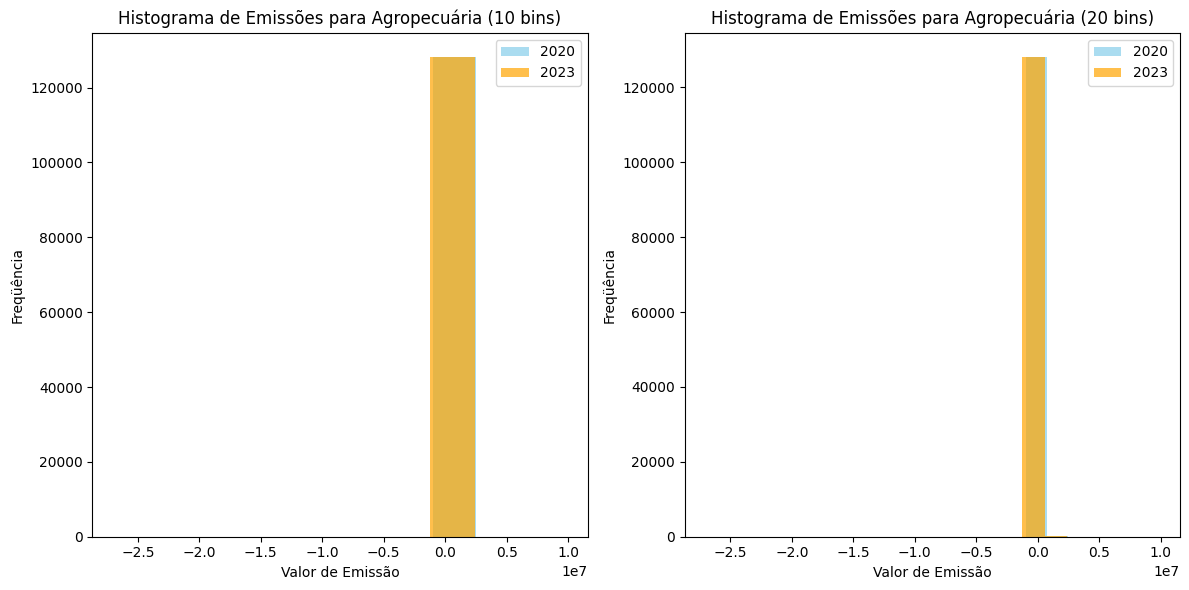

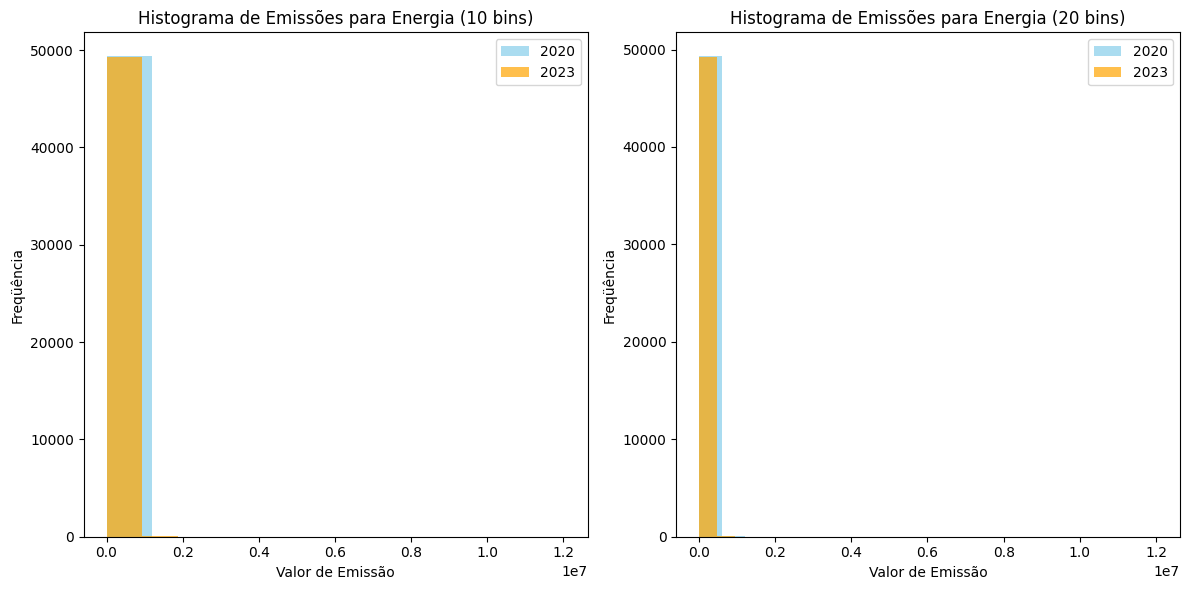

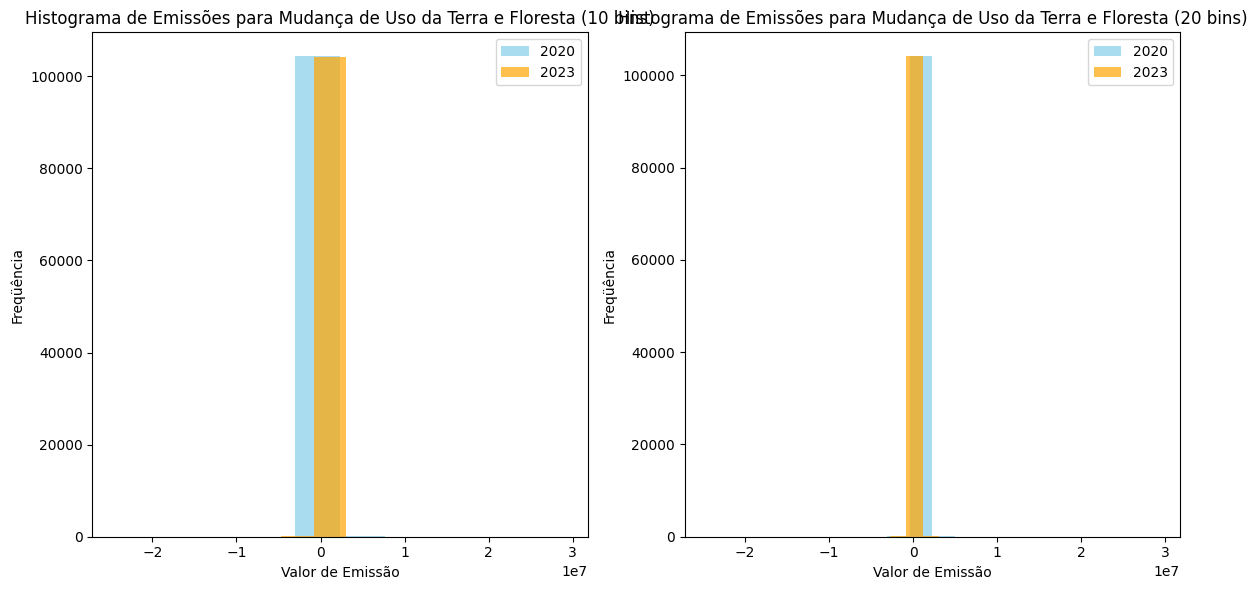

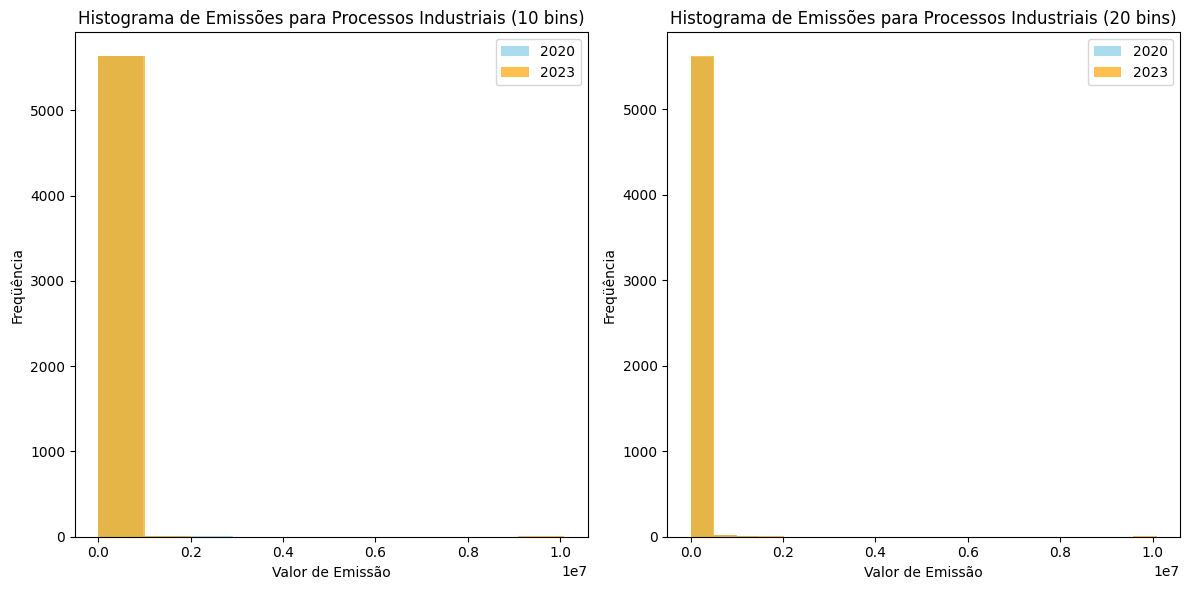

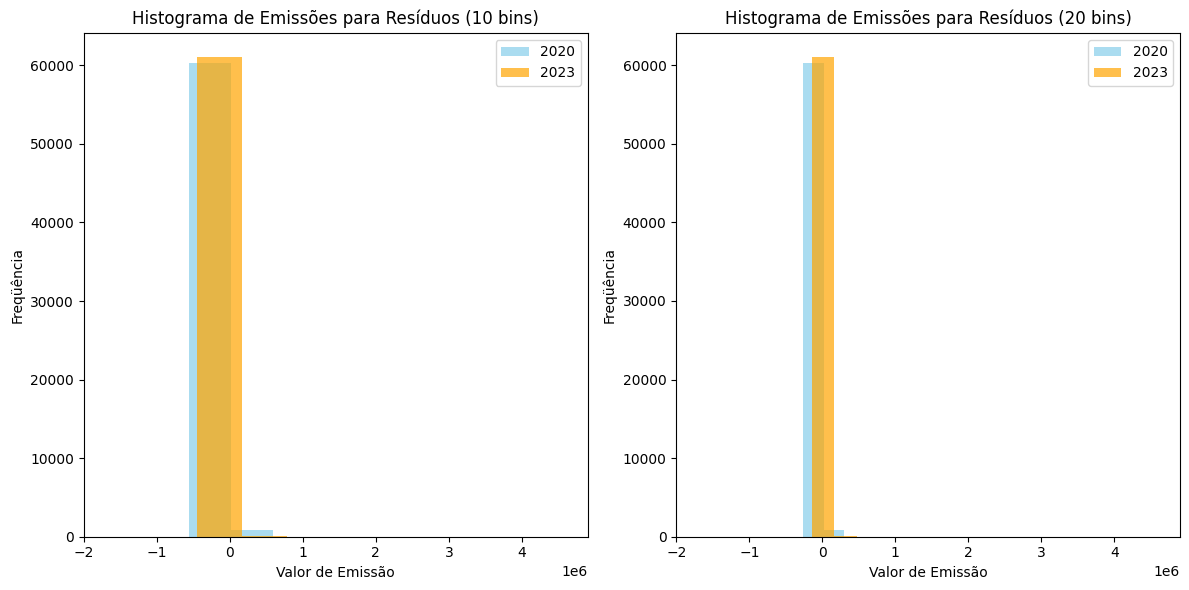

In [57]:
import matplotlib.pyplot as plt

# Agrupar dados por setor de emissão
grouped = df_visualization.groupby('Setor de emissão')

# Iterar por cada setor de emissão
for sector, data in grouped:
    plt.figure(figsize=(12, 6))  # Ajustar o tamanho da figura

    # Histograma com 10 bins
    plt.subplot(1, 2, 1)
    plt.hist(data['2020'], bins=10, alpha=0.7, label='2020', color='skyblue')
    plt.hist(data[2023], bins=10, alpha=0.7, label='2023', color='orange')
    plt.title(f'Histograma de Emissões para {sector} (10 bins)')
    plt.xlabel('Valor de Emissão')
    plt.ylabel('Freqüência')
    plt.legend()

    # Histograma com 20 bins
    plt.subplot(1, 2, 2)
    plt.hist(data['2020'], bins=20, alpha=0.7, label='2020', color='skyblue')
    plt.hist(data[2023], bins=20, alpha=0.7, label='2023', color='orange')
    plt.title(f'Histograma de Emissões para {sector} (20 bins)')
    plt.xlabel('Valor de Emissão')
    plt.ylabel('Freqüência')
    plt.legend()

    plt.tight_layout()
    plt.savefig(f'emission_histogram_{sector}.png') # Salvando o plot
    plt.show()



---



##🔹 Parte B – Z-score

###Utilizou-se a variável `2020` (emissão de CO₂) para:



* Calcular a média e o desvio padrão das emissões

* Simular um valor observado igual à média + 1 desvio

* Calcular o Z-score correspondente

* Determinar a probabilidade acumulada (P(X < valor observado)) utilizando a distribuição normal padrão

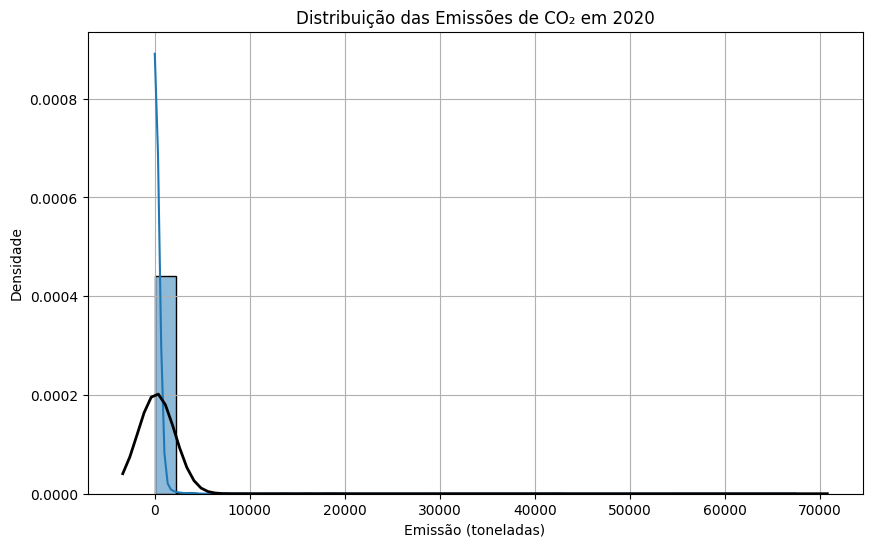


Média: 157.11, Desvio padrão: 1966.01
Valor observado (emissão): 2123.12 toneladas (média + 1 desvio)
Z-score = 1.00
Probabilidade de emissão < 2123.12 toneladas = 0.8413


In [20]:
# Parte B – Z-score da emissão em 2020
dados = df['2020'].dropna()
media = np.mean(dados)
desvio = np.std(dados)
x_obs = media + desvio
z = (x_obs - media) / desvio
prob = norm.cdf(z)

# Histograma com curva normal
plt.figure(figsize=(10, 6))
sns.histplot(dados, bins=30, kde=True, stat='density')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media, desvio)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Distribuição das Emissões de CO₂ em 2020")
plt.xlabel("Emissão (toneladas)")
plt.ylabel("Densidade")
plt.grid(True)
plt.show()

# Mostrar Z-score
print(f"\nMédia: {media:.2f}, Desvio padrão: {desvio:.2f}")
print(f"Valor observado (emissão): {x_obs:.2f} toneladas (média + 1 desvio)")
print(f"Z-score = {z:.2f}")
print(f"Probabilidade de emissão < {x_obs:.2f} toneladas = {prob:.4f}")

###Simular de um experimento em que monitoramos a emissão de CO₂ por município no setor industrial:

* Suponha que o limite de referência para ações corretivas seja 1500 toneladas/ano. A ideia é avaliar se um município com emissão acima desse valor está de fato destoando do comportamento geral dos demais.

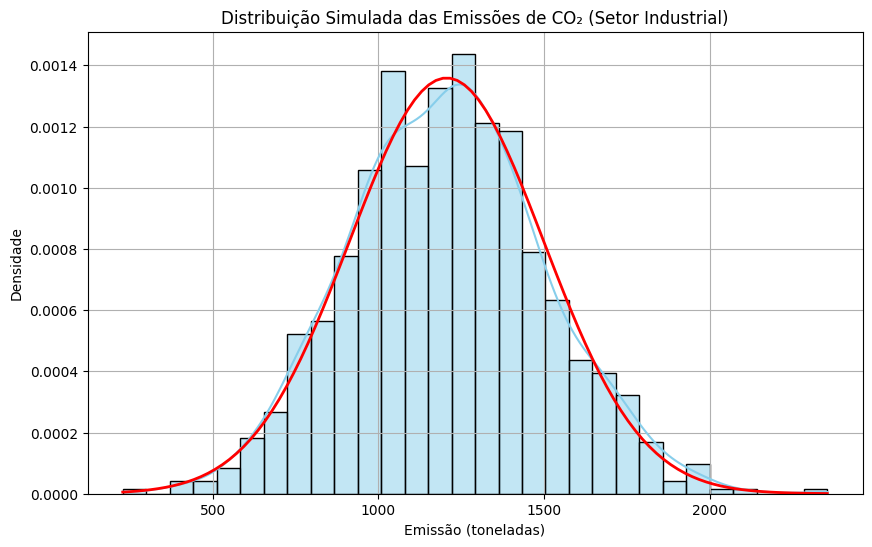


Valor observado: 1600 toneladas
Média da população simulada: 1205.80 toneladas
Desvio padrão: 293.62 toneladas

Z-score: 1.34
Probabilidade de uma emissão ser menor que 1600 toneladas: 0.9103 (91.03%)


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Gerar dados artificiais de emissão (em toneladas)
np.random.seed(42)
dados_emissao = np.random.normal(loc=1200, scale=300, size=1000)  # média = 1200, desvio = 300

# Plotar histograma com curva normal
plt.figure(figsize=(10, 6))
sns.histplot(dados_emissao, bins=30, kde=True, stat='density', color='skyblue', edgecolor='black')

# Curva de distribuição normal
x = np.linspace(min(dados_emissao), max(dados_emissao), 100)
p = norm.pdf(x, np.mean(dados_emissao), np.std(dados_emissao))
plt.plot(x, p, 'r', linewidth=2)

plt.title("Distribuição Simulada das Emissões de CO₂ (Setor Industrial)")
plt.xlabel("Emissão (toneladas)")
plt.ylabel("Densidade")
plt.grid(True)
plt.show()


valor_observado = 1600
media = np.mean(dados_emissao)
desvio = np.std(dados_emissao)

print(f"\nValor observado: {valor_observado} toneladas")
print(f"Média da população simulada: {media:.2f} toneladas")
print(f"Desvio padrão: {desvio:.2f} toneladas")

z = (valor_observado - media) / desvio
prob = norm.cdf(z)

print(f"\nZ-score: {z:.2f}")
print(f"Probabilidade de uma emissão ser menor que {valor_observado} toneladas: {prob:.4f} ({prob*100:.2f}%)")




---



## 🔹 Parte C – Distribuição Binomial
Hipótese: 80% dos municípios possuem emissões > 1000 toneladas.

Simulamos 10 leituras com essa probabilidade:

→  Consistente com a expectativa de 8 em 10.

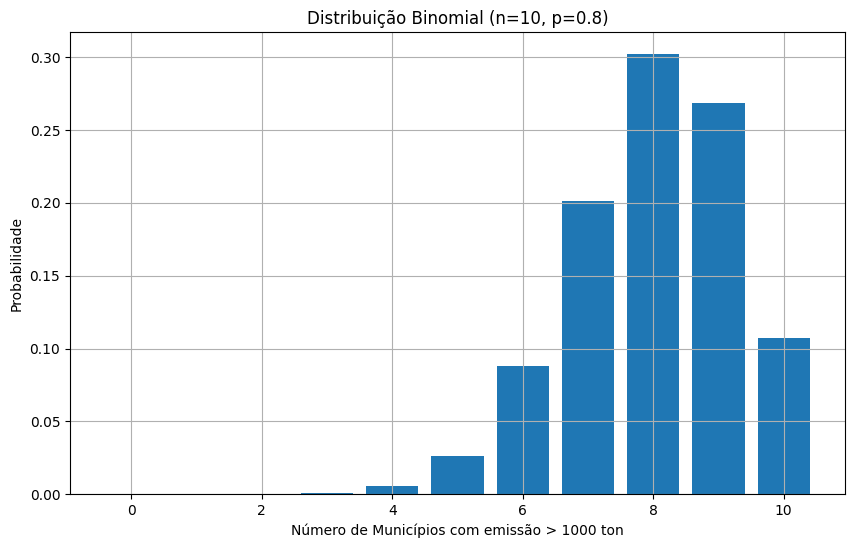


Amostras simuladas: [ 7  7  9  7 10  6  8  7  8  8]


In [58]:
# Parte C – Distribuição Binomial (exemplo adaptado)
n = 10       # número de leituras
p = 0.8      # probabilidade de sucesso (emissão > 1000 toneladas)
x = list(range(n + 1))
probs = binom.pmf(x, n, p)

plt.figure(figsize=(10, 6))
plt.bar(x, probs)
plt.title(f'Distribuição Binomial (n={n}, p={p})')
plt.xlabel('Número de Municípios com emissão > 1000 ton')
plt.ylabel('Probabilidade')
plt.grid(True)
plt.show()

# Simular 10 amostras binomiais
amostras = binom.rvs(n, p, size=10)
print(f"\nAmostras simuladas: {amostras}")




---

